In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns

In [6]:
data = pd.read_csv('../thread_count_performance_measurements.csv')

data = data.transpose()
data.columns = data.loc['runName']
data = data.drop(list(filter(lambda x: not x.isdigit(), data.index)), axis=0)
data.loc['mean'] = data.mean(axis=0).round().astype(int)

data

runName,eightThreads_constant,singleThread_linear,threeThreads_linear,sevenThreads_sinus,fiveThreads_constant,twoThreads_linear,eightThreads_sinus,fourThreads_linear,sevenThreads_constant,fiveThreads_linear,...,sevenThreads_linear,sixThreads_sinus,twoThreads_constant,sixThreads_constant,twoThreads_sinus,fourThreads_sinus,sixThreads_linear,fiveThreads_sinus,threeThreads_constant,singleThread_sinus
0,1936,2354,1255,1455,964,1862,1346,996,859,999,...,856,1328,1617,930,2053,1406,1050,2029,1489,3661
1,2990,2346,1213,1275,984,1746,1277,981,909,978,...,847,1336,1639,910,2015,1438,1100,1989,1584,3121
2,1050,2262,1177,1289,967,1607,1309,997,857,1009,...,877,1345,1596,939,2035,1558,1165,1929,1636,2895
3,1016,2324,1134,1286,990,1630,1274,1036,882,1015,...,865,1380,1649,954,2030,1582,1251,1853,1660,2810
4,905,2173,1198,1286,1025,1638,1290,985,858,1012,...,886,1330,1602,953,2052,1578,1257,1857,1688,2757
mean,1579,2292,1195,1318,986,1697,1299,999,873,1003,...,866,1344,1621,937,2037,1512,1165,1931,1611,3049


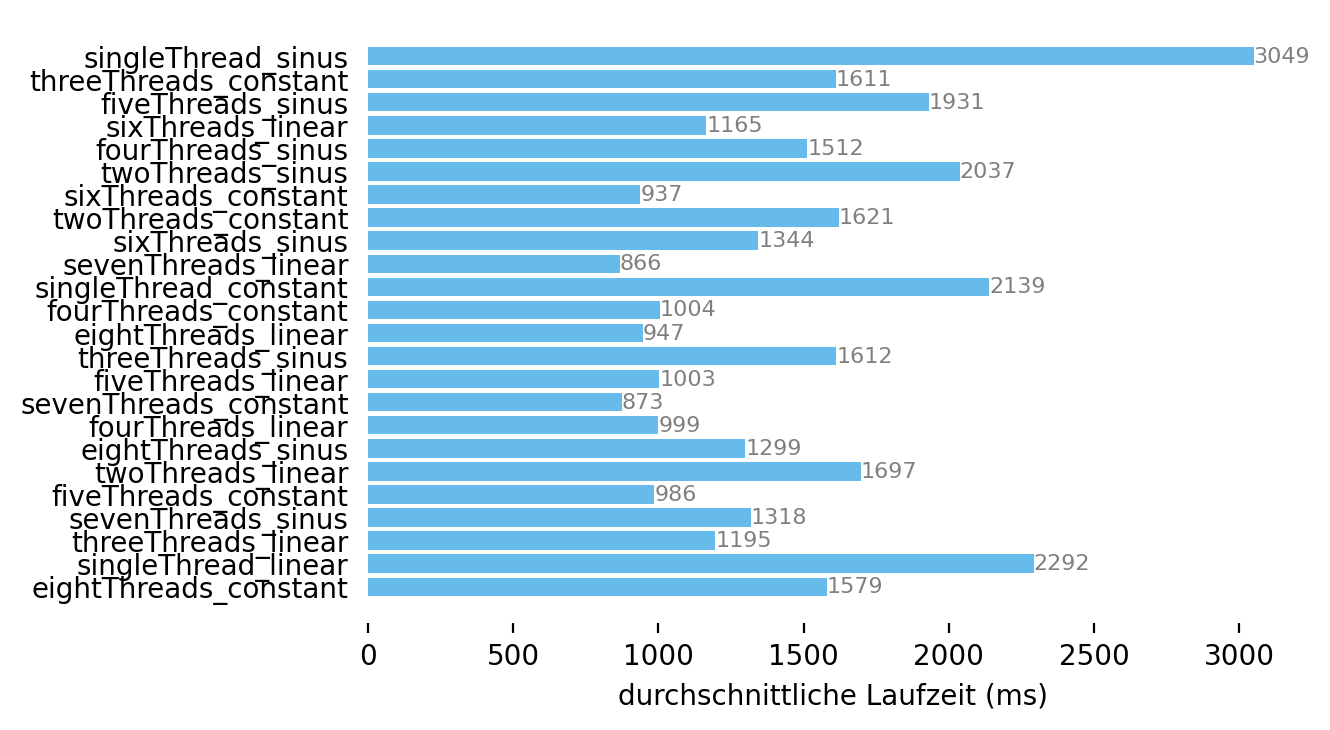

In [7]:
from matplotlib.text import Text

fig, ax = plt.subplots(figsize=(6,4), dpi=200)
bar_plot = ax.barh(data.columns, data.loc['mean'], color='#56B4E9', alpha=0.9)
ax.set(xlabel='durchschnittliche Laufzeit (ms)')
plt.tick_params(left = False)

# Die Ausführungszeit an den Balken angezeigen
for i, rect in enumerate(bar_plot):
    text: Text = plt.text(i, data.columns[i], data.loc['mean'][i], verticalalignment='center', horizontalalignment='left',alpha=0.5, fontsize=8)
    text.set_x(rect.get_width())
    

for spine in ax.spines.values():
    spine.set_visible(False)

In [17]:
fig.savefig('measurements_thread_count.pdf', dpi=300, bbox_inches='tight', pad_inches=0, format='pdf')